# Assignment 2: Linear Regression

## Daisy Pinaroc

## Feature Engineering

In [2]:
# Load the dataset as a dataframe using pandas library 
import pandas as pd

train_dataframe = pd.read_csv("train.csv")

# Print a few columns using head() function
train_dataframe.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Exploratory data analysis

In [3]:
# Checking for duplicate rows
train_dataframe.duplicated().sum()

0

* Are there duplicate rows in the data? If yes, how many?  
There are **no** duplicate rows so we won't have to drop any


In [4]:
# Check the data types of the columns using info() function
train_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# Print the number of rows you are left with after removing duplicate rows
len(train_dataframe.index)

1460

### Feature and Label Definition

In [6]:
train_features_df = train_dataframe[["LotShape","LotConfig","Neighborhood","OverallQual", "OverallCond","YearRemodAdd", "GrLivArea","MoSold"]] 
train_features_df.head()

,LotShape,LotConfig,Neighborhood,OverallQual,OverallCond,YearRemodAdd,GrLivArea,MoSold
0,Reg,Inside,CollgCr,7,5,2003,1710,2
1,Reg,FR2,Veenker,6,8,1976,1262,5
2,IR1,Inside,CollgCr,7,5,2002,1786,9
3,IR1,Corner,Crawfor,7,5,1970,1717,2
4,IR1,FR2,NoRidge,8,5,2000,2198,12


In [7]:
# Check for completeness
train_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LotShape      1460 non-null   object
 1   LotConfig     1460 non-null   object
 2   Neighborhood  1460 non-null   object
 3   OverallQual   1460 non-null   int64 
 4   OverallCond   1460 non-null   int64 
 5   YearRemodAdd  1460 non-null   int64 
 6   GrLivArea     1460 non-null   int64 
 7   MoSold        1460 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 91.4+ KB


In [8]:
# Drop rows where you see at least one NULL entry
train_features_df = train_features_df.dropna()

In [9]:
# Check for completeness AGAIN
train_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LotShape      1460 non-null   object
 1   LotConfig     1460 non-null   object
 2   Neighborhood  1460 non-null   object
 3   OverallQual   1460 non-null   int64 
 4   OverallCond   1460 non-null   int64 
 5   YearRemodAdd  1460 non-null   int64 
 6   GrLivArea     1460 non-null   int64 
 7   MoSold        1460 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 91.4+ KB


In [10]:
# Creating a housing_features_df data frame with mentioned columns
housing_features_df = train_features_df[["LotShape","LotConfig","Neighborhood","OverallQual", "OverallCond","YearRemodAdd", "GrLivArea","MoSold"]] 

# Print a few rows of the data frame
housing_features_df.head()

,LotShape,LotConfig,Neighborhood,OverallQual,OverallCond,YearRemodAdd,GrLivArea,MoSold
0,Reg,Inside,CollgCr,7,5,2003,1710,2
1,Reg,FR2,Veenker,6,8,1976,1262,5
2,IR1,Inside,CollgCr,7,5,2002,1786,9
3,IR1,Corner,Crawfor,7,5,1970,1717,2
4,IR1,FR2,NoRidge,8,5,2000,2198,12


In [11]:
# Creating sales_price_df data frame with mentioned column as label
sales_price_df = train_dataframe[["SalePrice"]]

# Printing a few rows of the data frame
sales_price_df.head()

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


#### Which features are **categorical-nominal?** 

* LotConfig: Nominal
* Neighborhood: Nominal

### Feature Tranformation

#### Categorical features: LotShape, LotConfig, Neighborhood

####  Tranforming LotShape feature

In [12]:
# Transforming LotShape column to a list

lotshape_to_list = housing_features_df["LotShape"].to_list()

print (lotshape_to_list)

['Reg', 'Reg', 'IR1', 'IR1', 'IR1', 'IR1', 'Reg', 'IR1', 'Reg', 'Reg', 'Reg', 'IR1', 'IR2', 'IR1', 'IR1', 'Reg', 'IR1', 'Reg', 'Reg', 'Reg', 'IR1', 'Reg', 'Reg', 'Reg', 'IR1', 'Reg', 'Reg', 'Reg', 'IR1', 'IR1', 'Reg', 'IR1', 'Reg', 'IR1', 'Reg', 'Reg', 'Reg', 'Reg', 'Reg', 'Reg', 'Reg', 'Reg', 'IR1', 'IR1', 'Reg', 'Reg', 'IR1', 'Reg', 'Reg', 'Reg', 'IR2', 'Reg', 'IR2', 'IR1', 'Reg', 'IR1', 'Reg', 'IR1', 'IR2', 'Reg', 'Reg', 'Reg', 'IR1', 'IR1', 'Reg', 'Reg', 'Reg', 'IR1', 'Reg', 'Reg', 'IR1', 'Reg', 'IR1', 'Reg', 'Reg', 'Reg', 'IR1', 'Reg', 'Reg', 'Reg', 'Reg', 'Reg', 'Reg', 'IR1', 'IR1', 'Reg', 'IR2', 'Reg', 'IR1', 'Reg', 'Reg', 'Reg', 'IR1', 'Reg', 'IR1', 'IR2', 'IR1', 'Reg', 'Reg', 'IR1', 'IR1', 'Reg', 'Reg', 'IR1', 'Reg', 'Reg', 'Reg', 'Reg', 'Reg', 'IR1', 'Reg', 'IR1', 'Reg', 'Reg', 'IR1', 'Reg', 'Reg', 'Reg', 'Reg', 'Reg', 'IR1', 'Reg', 'Reg', 'Reg', 'IR1', 'Reg', 'IR1', 'IR1', 'Reg', 'Reg', 'Reg', 'IR1', 'Reg', 'IR1', 'IR1', 'Reg', 'IR1', 'Reg', 'IR1', 'IR1', 'Reg', 'Reg', 'Reg'

In [13]:
# We can now transform the data to one hot vectors using scikit-learn 
# But scikit learn can work with multiple features at once, so it expects list of lists
# We need to convert the 1-dimensional list into a list of lists(2D)


lotshape_to_list_of_lists = []

for shape in lotshape_to_list:
    lotshape_to_list_of_lists.append([shape])

# Sanity check: print the first 5 elements
print (lotshape_to_list_of_lists[:5])


[['Reg'], ['Reg'], ['IR1'], ['IR1'], ['IR1']]


In [14]:
# We import the OneHotEncoder class from scikit-learn preprocessing
from sklearn.preprocessing import OneHotEncoder

# now let's define an object
lotshape_encoder = OneHotEncoder()

# Fit our data (i.e., extract and order vocabulary)
lotshape_encoder.fit(lotshape_to_list_of_lists)

print(f"Unique vocabulary items {len(lotshape_encoder.categories_[0])}\n")

# Now transform each example in our data into 1-hot form
lotshape_transformed = lotshape_encoder.transform(lotshape_to_list_of_lists)

# Transform the result object into a matrix
lotshape_transformed = lotshape_transformed.toarray()

# Print the transformed data
print (lotshape_transformed)

Unique vocabulary items 4

[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


In [15]:
# create a dataframe back from the array

lotshape_transformed_df = pd.DataFrame(lotshape_transformed)
lotshape_transformed_df.head()
print(lotshape_transformed_df.shape)
print(housing_features_df.shape)

(1460, 4)
(1460, 8)


In [16]:
# Now concatenate this feature back to the original dataframe 
housing_features_df.reset_index(drop=True, inplace=True)
lotshape_transformed_df.reset_index(drop=True, inplace=True)

housing_features_transformed_df = pd.concat([housing_features_df,lotshape_transformed_df], axis=1)
housing_features_transformed_df.shape

(1460, 12)

In [17]:
# We don't need LotShape now since we have already transformed it
housing_features_transformed_df = housing_features_transformed_df.drop(columns=["LotShape"], axis=1)

####  Tranforming **LotConfig** feature

In [18]:
# Transforming LotConfig column to a list

lotconfig_to_list = housing_features_transformed_df["LotConfig"].to_list()

print (lotconfig_to_list)

['Inside', 'FR2', 'Inside', 'Corner', 'FR2', 'Inside', 'Inside', 'Corner', 'Inside', 'Corner', 'Inside', 'Inside', 'Inside', 'Inside', 'Corner', 'Corner', 'CulDSac', 'Inside', 'Inside', 'Inside', 'Corner', 'Inside', 'Inside', 'Inside', 'Inside', 'Corner', 'Corner', 'Inside', 'CulDSac', 'Inside', 'Inside', 'CulDSac', 'Corner', 'Inside', 'Inside', 'Inside', 'Corner', 'Inside', 'Inside', 'Inside', 'Inside', 'Inside', 'CulDSac', 'CulDSac', 'Inside', 'Inside', 'CulDSac', 'Inside', 'Inside', 'Inside', 'Corner', 'Inside', 'Corner', 'Inside', 'Inside', 'Inside', 'Inside', 'Corner', 'CulDSac', 'Inside', 'Inside', 'Inside', 'Inside', 'Inside', 'Inside', 'Inside', 'Inside', 'Inside', 'Corner', 'Corner', 'Inside', 'Corner', 'Corner', 'Inside', 'Corner', 'Inside', 'Inside', 'Inside', 'Inside', 'Corner', 'Corner', 'FR2', 'Inside', 'Inside', 'Inside', 'Corner', 'Inside', 'Corner', 'Corner', 'Inside', 'Inside', 'Inside', 'Inside', 'Corner', 'Inside', 'Corner', 'Inside', 'Inside', 'Corner', 'Inside', '

In [19]:
# We can now transform the data to one hot vectors using scikit-learn 
# But scikit learn can work with multiple features at once, so it expects list of lists
# We need to convert the 1-dimensional list into a list of lists(2D)


lotconfig_to_list_of_lists = []

for config in lotconfig_to_list:
    lotconfig_to_list_of_lists.append([config])

# Sanity check: print the first 5 elements
print (lotconfig_to_list_of_lists[:5])


[['Inside'], ['FR2'], ['Inside'], ['Corner'], ['FR2']]


In [20]:
# We import the OneHotEncoder class from scikit-learn preprocessing
# from sklearn.preprocessing import OneHotEncoder

# now let's define an object
lotconfig_encoder = OneHotEncoder()

# Fit our data (i.e., extract and order vocabulary)
lotconfig_encoder.fit(lotconfig_to_list_of_lists)

print(f"Unique vocabulary items {len(lotconfig_encoder.categories_[0])}\n")

# Now transform each example in our data into 1-hot form
lotconfig_transformed = lotconfig_encoder.transform(lotconfig_to_list_of_lists)

# Transform the result object into a matrix
lotconfig_transformed = lotconfig_transformed.toarray()

# Print the transformed data
print (lotconfig_transformed)

Unique vocabulary items 5

[[0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


In [21]:
# create a dataframe back from the array

lotconfig_transformed_df = pd.DataFrame(lotconfig_transformed)
lotconfig_transformed_df.head()
print(lotconfig_transformed_df.shape)
print(housing_features_transformed_df.shape)

(1460, 5)
(1460, 11)


In [22]:
# Now concatenate this feature back to the original dataframe 
housing_features_transformed_df.reset_index(drop=True, inplace=True)
lotconfig_transformed_df.reset_index(drop=True, inplace=True)

housing_features_transformed_df = pd.concat([housing_features_transformed_df,lotconfig_transformed_df], axis=1)
housing_features_transformed_df.shape

(1460, 16)

In [23]:
# We don't need LotConfig now since we have already transformed it
housing_features_transformed_df = housing_features_transformed_df.drop(columns=["LotConfig"], axis=1)
# housing_features_transformed_df.head()

####  Tranforming Neighborhood feature

In [24]:
# Transforming Neighborhood column to a list

neigh_to_list = housing_features_transformed_df["Neighborhood"].to_list()

print (neigh_to_list)

['CollgCr', 'Veenker', 'CollgCr', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst', 'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'Sawyer', 'CollgCr', 'NAmes', 'BrkSide', 'NAmes', 'Sawyer', 'SawyerW', 'NAmes', 'NridgHt', 'IDOTRR', 'CollgCr', 'MeadowV', 'Sawyer', 'NridgHt', 'NAmes', 'NridgHt', 'NAmes', 'BrkSide', 'IDOTRR', 'Sawyer', 'CollgCr', 'NAmes', 'NridgHt', 'NridgHt', 'CollgCr', 'NAmes', 'NAmes', 'Edwards', 'NAmes', 'Timber', 'SawyerW', 'CollgCr', 'NAmes', 'NridgHt', 'Mitchel', 'Somerst', 'OldTown', 'Sawyer', 'Gilbert', 'BrkSide', 'IDOTRR', 'Veenker', 'NAmes', 'NAmes', 'Somerst', 'CollgCr', 'StoneBr', 'CollgCr', 'SawyerW', 'IDOTRR', 'NridgHt', 'OldTown', 'CollgCr', 'NridgHt', 'NAmes', 'CollgCr', 'OldTown', 'ClearCr', 'NAmes', 'Mitchel', 'Gilbert', 'NAmes', 'OldTown', 'MeadowV', 'NAmes', 'BrkSide', 'Sawyer', 'OldTown', 'NAmes', 'Mitchel', 'Somerst', 'NAmes', 'Gilbert', 'NoRidge', 'Gilbert', 'Somerst', 'IDOTRR', 'CollgCr', 'NAmes', 'NAmes', 'Crawfor', 'OldTown', 'CollgCr', 'Gilbert

In [25]:
# We can now transform the data to one hot vectors using scikit-learn 
# But scikit learn can work with multiple features at once, so it expects list of lists
# We need to convert the 1-dimensional list into a list of lists(2D)


neigh_to_list_of_lists = []

for h in neigh_to_list:
    neigh_to_list_of_lists.append([h])

# Sanity check: print the first 5 elements
print (neigh_to_list_of_lists[:5])


[['CollgCr'], ['Veenker'], ['CollgCr'], ['Crawfor'], ['NoRidge']]


In [26]:
# We import the OneHotEncoder class from scikit-learn preprocessing
# from sklearn.preprocessing import OneHotEncoder

# now let's define an object
neigh_encoder = OneHotEncoder()

# Fit our data (i.e., extract and order vocabulary)
neigh_encoder.fit(neigh_to_list_of_lists)

print(f"Unique vocabulary items {len(neigh_encoder.categories_[0])}\n")

# Now transform each example in our data into 1-hot form
neigh_transformed = neigh_encoder.transform(neigh_to_list_of_lists)

# Transform the result object into a matrix
neigh_transformed = neigh_transformed.toarray()

# Print the transformed data
print (neigh_transformed)

Unique vocabulary items 25

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [27]:
# create a dataframe back from the array

neigh_transformed_df = pd.DataFrame(neigh_transformed)
neigh_transformed_df.head()
print(neigh_transformed_df.shape)
print(housing_features_transformed_df.shape)

(1460, 25)
(1460, 15)


In [28]:
# Now concatenate this feature back to the original dataframe 
housing_features_transformed_df.reset_index(drop=True, inplace=True)
neigh_transformed_df.reset_index(drop=True, inplace=True)

housing_features_transformed_df = pd.concat([housing_features_transformed_df,neigh_transformed_df], axis=1)
housing_features_transformed_df.shape

(1460, 40)

In [29]:
# We don't need Neighborhood now since we have already transformed it
housing_features_transformed_df = housing_features_transformed_df.drop(columns=["Neighborhood"], axis=1)
# housing_features_transformed_df.head()

### How many rows and columns are there in the dataset now? 
* 1460 rows
* 39 columns 

In [30]:
# Checking to see how many rows and columns there are in the dataset
print(housing_features_transformed_df)

      OverallQual  OverallCond  YearRemodAdd  GrLivArea  MoSold    0    1  \
0               7            5          2003       1710       2  0.0  0.0   
1               6            8          1976       1262       5  0.0  0.0   
2               7            5          2002       1786       9  1.0  0.0   
3               7            5          1970       1717       2  1.0  0.0   
4               8            5          2000       2198      12  1.0  0.0   
...           ...          ...           ...        ...     ...  ...  ...   
1455            6            5          2000       1647       8  0.0  0.0   
1456            6            6          1988       2073       2  0.0  0.0   
1457            7            9          2006       2340       5  0.0  0.0   
1458            5            6          1996       1078       4  0.0  0.0   
1459            5            6          1965       1256       6  0.0  0.0   

        2    3    0  ...   15   16   17   18   19   20   21   22   23   24 

In [31]:
# Print a few columns of the transformed housing_features_df using head() function
housing_features_transformed_df.head()

,OverallQual,OverallCond,YearRemodAdd,GrLivArea,MoSold,0,1,2,3,0,...,15,16,17,18,19,20,21,22,23,24
0,7,5,2003,1710,2,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6,8,1976,1262,5,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,7,5,2002,1786,9,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7,5,1970,1717,2,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8,5,2000,2198,12,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Feature Scaling

In [32]:
# We will implement MinMax Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
housing_features_transformed_df[
    ['OverallQual',
    'OverallCond',
    'YearRemodAdd', 
    'GrLivArea',
    'MoSold']] = scaler.fit_transform(housing_features_transformed_df[['OverallQual', 'OverallCond','YearRemodAdd','GrLivArea','MoSold']])
housing_features_transformed_df.head()



,OverallQual,OverallCond,YearRemodAdd,GrLivArea,MoSold,0,1,2,3,0,...,15,16,17,18,19,20,21,22,23,24
0,0.666667,0.500,0.883333,0.259231,0.090909,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.555556,0.875,0.433333,0.174830,0.363636,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.666667,0.500,0.866667,0.273549,0.727273,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.666667,0.500,0.333333,0.260550,0.090909,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.777778,0.500,0.833333,0.351168,1.000000,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Data Splitting

In [33]:
# Splitting the dataset into training, validation & test splits of size 80%-10%-10%
from sklearn.model_selection import train_test_split

features = housing_features_transformed_df.to_numpy()
labels = sales_price_df.to_numpy()

print (f"Features' shape [no. of examples * feature vector size] =  {features.shape}")
print (f"Label's shape [no. of examples * 1] = {labels.shape}")

Features' shape [no. of examples * feature vector size] =  (1460, 39)
Label's shape [no. of examples * 1] = (1460, 1)


In [34]:
# First derive the test data
x_, x_test, y_, y_test = train_test_split(features, labels, test_size=0.10, random_state=42)

# Then create the validation data
x_train, x_valid, y_train, y_valid = train_test_split(x_, y_, test_size=0.10, random_state=42)

print (f"Training: Features' shape [no. of examples * feature vector size] =  {x_train.shape}")
print (f"Training: Label's shape [no. of examples * 1] = {y_train.shape}")

print (f"Validation: Features' shape [no. of examples * feature vector size] =  {x_valid.shape}")
print (f"Validation: Label's shape [no. of examples * 1] = {y_valid.shape}")

print (f"Test: Features' shape [no. of examples * feature vector size] =  {x_test.shape}")
print (f"Test: Label's shape [no. of examples * 1] = {y_test.shape}")


Training: Features' shape [no. of examples * feature vector size] =  (1182, 39)
Training: Label's shape [no. of examples * 1] = (1182, 1)
Validation: Features' shape [no. of examples * feature vector size] =  (132, 39)
Validation: Label's shape [no. of examples * 1] = (132, 1)
Test: Features' shape [no. of examples * feature vector size] =  (146, 39)
Test: Label's shape [no. of examples * 1] = (146, 1)


#### *What does each category mean again? (Training, Validation, Test)*

## Train Linear Regression using Training Data

In [35]:
# Training our linear regression model using scikit-learn's LinearRegression module
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics

regression = LinearRegression(copy_X=True)
y_train = y_train.flatten()

# training 
regression = regression.fit(x_train, y_train)

print ("Training complete")

Training complete


## Evaluation on test data

In [36]:
# Observing the performance of our model using MSE, MAE, correlation
import sklearn.metrics as metrics
from scipy.stats import pearsonr

# perform prediction on test data
y_test = y_test.flatten()
y_test_predicted = regression.predict(x_test)

mean_squared_error=metrics.mean_squared_error(y_test, y_test_predicted)
mean_absolute_error=metrics.mean_absolute_error(y_test, y_test_predicted)
correlation = pearsonr(y_test, y_test_predicted)

print (f"Mean Squared Error (MSE) on training data: {mean_squared_error}")
print (f"Mean Absolute Error (MAE) on training data: {mean_absolute_error}")
print (f"Pearson correlation coefficient between training and test data: {correlation}")

Mean Squared Error (MSE) on training data: 1765623710.3630137
Mean Absolute Error (MAE) on training data: 23372.77397260274
Pearson correlation coefficient between training and test data: PearsonRResult(statistic=0.906994765852838, pvalue=6.04584810591239e-56)


## Interpreting the evaluation results

* What do your MSE, MAE and correlation figures represent. Would you recommend a realtor to use your model to help their client in purchasing a house in Boston (*the dataset that we are using is from Boston housing market*)? 
    * The MSE is 1765623710, meaning that the data points are widely dispersed around the central mean. There are a lot of different types of houses in Boston in terms of lot shape, neighborhood location, square feet, etc.
    * A mean absolute error of 23372 means the predicted value for SalesPrice can on an average deviate from the actual value by 23372 (+- 23K USD), meaning that our model is learning well. I would recommend this model to a realtor since the predicted sales price of a house doesn't deviate very far from its actual value. I believe a realtor could use this model to help them predict the sales price of a house in Boston. 
        * *(Note for self: A greater value makes the model less reliable... right? yes i think)*
    * This means that the features we chose to analyze the data have been proven useful and important in predicting sales price.
    * Correlation between predicted and actual values for sales price is 0.91 which is very strong. This means that the data features used for analyzation are very effective in predicting the sales price for a house in Boston (as stated before). It also means that it is highly likely the predicted sales price is very close to the actual sales price.

## Analyze feature importants by plotting weights learned

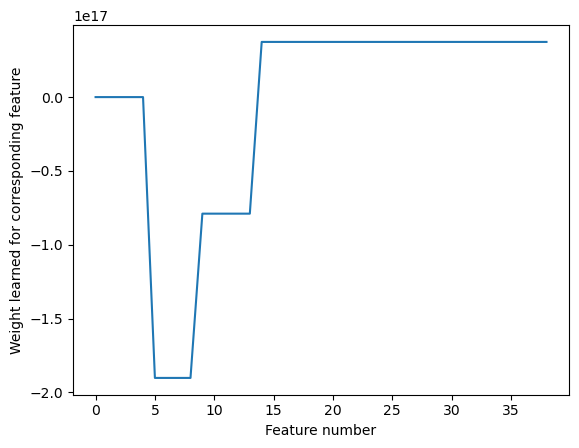

In [37]:
from matplotlib import pyplot as plt

weights = regression.coef_
plt.plot(range(len(weights)), weights)
plt.xlabel("Feature number")
plt.ylabel("Weight learned for corresponding feature")
plt.show()

* Can you plot the weights learned by the model and analyze it. Which features have more predictive power and is it intuitive?
    * Features that have more predictive power: #15-35 
    * This is intuitive since the line could be easily distinguished and read. The features that have more weight in predictive power are easily determined based on the line. 
        